# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

(-0.5, 249.5, 249.5, -0.5)

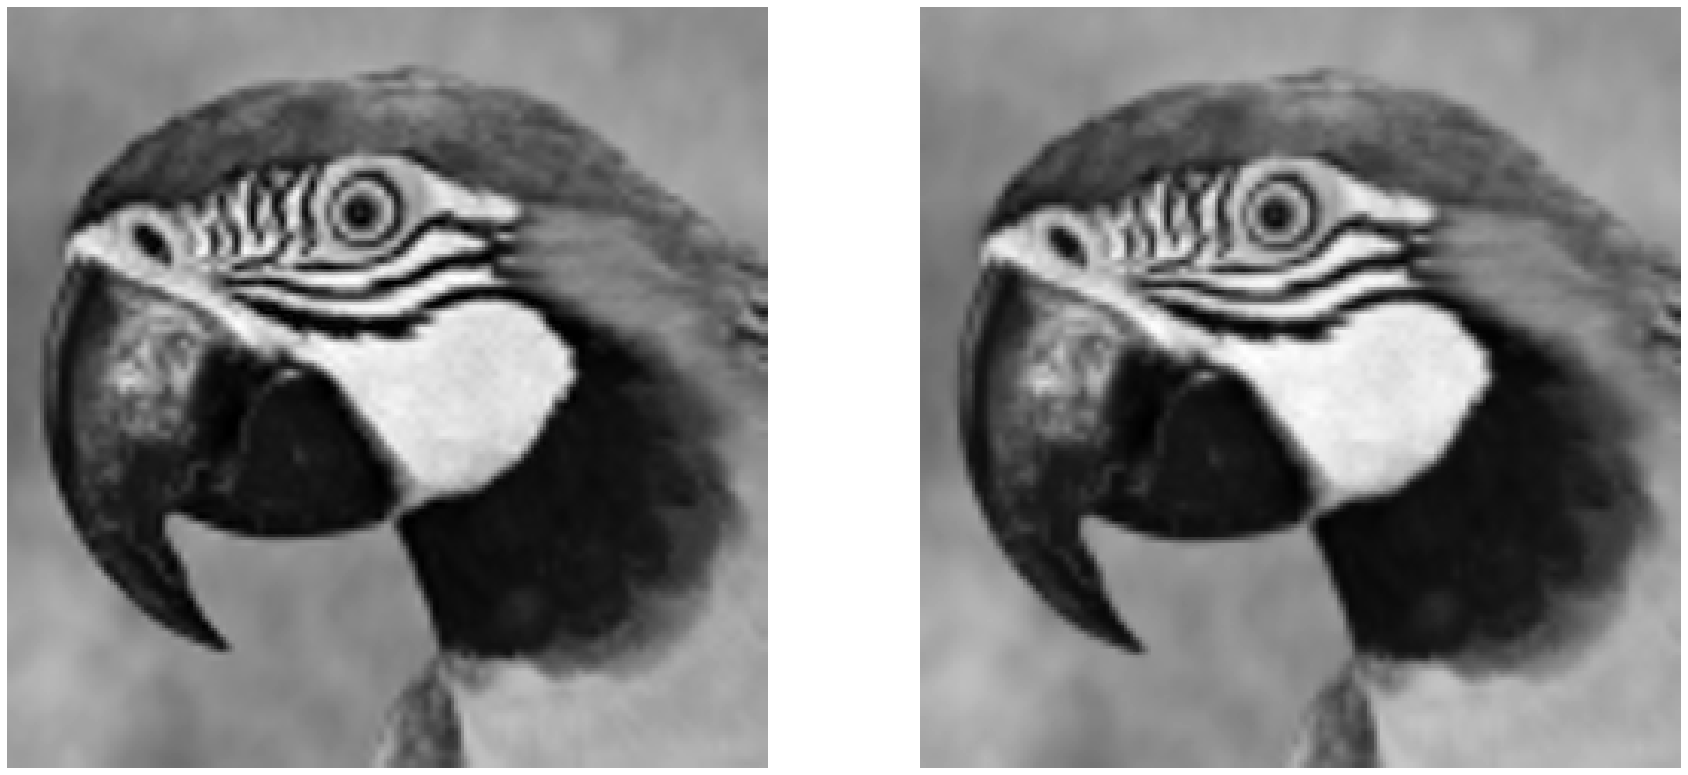

In [135]:
#TODO Do samodzielnej implementacji
# import ainvert
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np


A_1_matrix=[[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],
            [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],
            [-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],
            [ 2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0 ],
            [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0 ],
            [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0 ],
            [ 0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0 ],
            [ 0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0 ],
            [-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0 ],
            [ 0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0 ],
            [ 9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1 ],
            [-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1 ],
            [ 2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0 ],
            [ 0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0 ],
            [-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1 ],
            [ 4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1 ]]

# Load required files
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate

def pochodne(pkt, image):
    X_size, Y_size = image.shape
    
    X = pkt[0]
    Y = pkt[1]
    upX = pkt[0] - 1
    downX = pkt[0] + 1
    leftY = pkt[1] - 1
    rightY = pkt[1] + 1
    
    if upX < 0:
        upX = 0
        
    if leftY < 0:
        leftY = 0
        
    if downX >= X_size:
        downX = X_size -1
        
    if rightY >= Y_size:
        rightY = Y_size -1
    
    pkt = image[X,Y]
    pkt_oX = (int(image[X,rightY]) - int(image[X, leftY])) / 2
    pkt_oY = (int(image[downX,Y]) - int(image[upX, Y])) / 2
    pkt_XY = (int(image[downX,rightY]) - int(image[X, leftY]) - int(image[upX, Y]) + int(image[X,Y])) /4

    return [pkt, pkt_oX, pkt_oY, pkt_XY]
    
    

def interpolacja_bicubic(image, wsp_pion, wsp_poziom):
    roz_X, roz_Y = image.shape
    roz_X_wyj=int(roz_X*wsp_pion)
    roz_Y_wyj=int(roz_Y*wsp_poziom)
    
    obraz_wyj=np.zeros([roz_X_wyj, roz_Y_wyj])

    for i in range(0, roz_X_wyj):
        for j in range(0, roz_Y_wyj):
            i_x = int( i / wsp_pion)
            j_y = int( j / wsp_poziom)
            
            a_x, a_y = i_x, j_y
            b_x, b_y = i_x, j_y + 1
            c_x, c_y = i_x + 1 , j_y + 1
            d_x, d_y = i_x + 1, j_y
            

            if b_y >= roz_Y:
                b_y = roz_Y -1
                
            if c_x >= roz_X:
                c_x = roz_X -1
            
            if c_y >= roz_Y:
                c_y = roz_Y -1
            
            if d_x >= roz_X:
                d_x = roz_X -1

    
            i_ = (i / wsp_pion) - i_x
            j_ = (j / wsp_poziom) - j_y
            
            
            [A, A_oX, A_oY, A_XY] = pochodne([a_x, a_y], image)
            [B, B_oX, B_oY, B_XY] = pochodne([b_x, b_y], image)
            [C, C_oX, C_oY, C_XY] = pochodne([c_x, c_y], image)
            [D, D_oX, D_oY, D_XY] = pochodne([d_x, d_y], image)
            
            
            x=[A, B, D, C, A_oX, B_oX, D_oX, C_oX, A_oY, B_oY, D_oY, C_oY, A_XY, B_XY, D_XY, C_XY]

            a= np.dot(A_1_matrix, x)

            a_matrix= [[a[0], a[4], a[8],  a[12]],
                       [a[1], a[5], a[9],  a[13]],
                       [a[2], a[6], a[10], a[14]],
                       [a[3], a[7], a[11], a[15]]]
            
            
            x_to_i=[[pow(j_,0),  pow(j_,1),   pow(j_,2),   pow(j_,3)]]
            y_to_i=[[pow(i_,0)],[pow(i_,1)], [pow(i_,2)], [pow(i_,3)]]
            
            piksel = np.dot(np.dot(x_to_i,a_matrix),y_to_i)

            obraz_wyj[i,j]=abs(piksel[0,0])

#             piksel = 0
#             for it_i in range(0,4):
#                 for it_j in range(0,4):
#                     piksel = piksel +(a_matrix[it_i][it_j]*pow(j_, it_i)*pow(i_,it_j))
# #             print(piksel)
#             if piksel < 0:
#                 print(piksel)
#             obraz_wyj[i,j]= abs(piksel)
    
    return obraz_wyj








#TEST

def python_bicubic(image, wsp_pion, wsp_poziom):
    X, Y = image.shape
    scaled_image = cv2.resize(image, (int(X*wsp_pion),int(Y*wsp_poziom)),  cv2.INTER_CUBIC)
    return scaled_image

parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert to RGB

f, (ax1, ax2) = plt.subplots(1,2, figsize=(30,30))
plt.gray()
ax1.axis('off')
ax1.imshow(interpolacja_bicubic(parrot, 2.5,2.5))

ax2.imshow(python_bicubic(parrot, 2.5, 2.5))
ax2.axis('off')


In [ ]:
# W porównaniu z interplacja dwulniową, interpolacja sześcienna jest zacznie bardziej skomplikowana. Ilość operacji arytemtycznych jest kilkukrotnie większa:
# -dla każdego piksela musimy wyliczyć pochodne cząstkowe
# -w interpolacji dwulniowej dla każdego piksela potrzebowaliśmy tak naprawdę "przetrzymać" 4 wartości pikseli i potem je odpowiednio przemnożyć.
# -w interpolacji sześciennej dla każdego piksela liczymy 4x pochodną z 4 punktów, wykorzystując w ten sposób 16 pikseli, następnie dokonujemy wielu obliczeń na macierzach,
#     które są o wiele bardziej skomplikwane niż w przypadku interpolacji dwuliniowej